In [58]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.feature_extraction.text import CountVectorizer


%matplotlib inline

In [2]:
path_to_data = '/mnt/storage/HRV/data_atfer_Nekit_skripts/'

In [3]:
selected_pp = pd.read_stata(path_to_data + 'selected_mod.dta')


In [4]:
files = os.listdir(path_to_data + 'code_string')

In [5]:
str2y = {'No':0, 'Have now':1, 'Have had':1}
str2num = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5}
def trigram2num (string):
    num = 0
    for i, char in enumerate(string):
        num += str2num[char]*(6**i)
    
    return int(num)

In [89]:
X = []
y = []
for file_i in files[:]:

    gidn = int(file_i.split('.')[0])
    if len(selected_pp[selected_pp.GIDN == gidn]) == 0 or selected_pp[selected_pp.GIDN == gidn].M8_4_19.values == '' \
        or selected_pp[selected_pp.GIDN == gidn].M8_4_19.values == '':
        print (gidn, 'don\'t find information about desease')
        continue
    print (gidn)
    ngramm = CountVectorizer(input = 'file', analyzer='char', ngram_range=(3, 3))
    analyze = ngramm.build_analyzer()
    with open(path_to_data + 'code_string/' + file_i, "r") as o:
        words = analyze(o)
    
    X_i = np.zeros(6**3)
    for i in words:
        X_i[trigram2num(i)] += 1
        
    X_i = X_i/sum(X_i)
        
    X.append(X_i)
    y.append(str2y[selected_pp[selected_pp.GIDN == gidn].M8_4_19.values[0]])

#     y.append(str2y[selected_pp[selected_pp.GIDN == gidn].M8_4_15.values[0]] or str2y[selected_pp[selected_pp.GIDN == gidn].M8_4_16.values[0]])

    


310405
412940
520263
110270
110280
110303 don't find information about desease
110307
110314 don't find information about desease
110318
110357
110477
110520 don't find information about desease
110552
110579
110664
110700 don't find information about desease
110723 don't find information about desease
110760
110784
110788
110797
110806 don't find information about desease
221381
221382
221383
221384
221385
221386
221387
221390
221392
221393
221394
221395
221398
221399
221407
221412
221413
221415
221417
221331
221335
221337
221340
221342
221344
221350
221351
221352
221358
221361
221367
221368
221370
221373
221376
221377
221378
221379
210295
210300
210308
210316
210320
210326
210334
210358
210360
210373 don't find information about desease
210393
210394
210414
210421
210430
210437
210441 don't find information about desease
210457
210458
210469
210471
210579
210598
210617
210622
210778
210809
210816
210825
211045
211222
221317
221318
221320
221322 don't find information about desease
22

In [64]:
X = np.array(X)

In [76]:
fi = 1.0/(len(words) - 1)


X = np.array(X)
F_w_orig = np.mean(X, axis = 0)
X[X < fi] = 0
B_w_orig = np.mean(X, axis = 0)

In [88]:
X = X[:, F_w_orig*100 > 0.7]

IndexError: index 74 is out of bounds for axis 1 with size 36

In [65]:
good_trigram = np.load(path_to_data + 'bad_trigramm_1.npy')
X = X[:, good_trigram]

In [87]:
print (len(X), len(y), len(X[0]))

1736 1736 36


In [83]:
y = np.array(y)
y[y==-1]=0

In [84]:
print (len(y[y == 0]), len(y[y==1]))

922 814


In [12]:
import sklearn.ensemble
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LinearRegression


In [13]:
def print_result(pred_y, train_y):
    print ('pos', len(train_y[train_y == 1]), 'neg', len(train_y[train_y == 0]))
    print ('pos_pred', len(pred_y[pred_y == 1]), 'neg_pred', len(pred_y[pred_y == 0]))
    res = pred_y - train_y
    fn = len(res[res == -1])*1./len(train_y)
    fp = len(res[res == 1])*1./len(train_y)
    tp = len(res[np.array((res == 0, train_y == 1)).all(axis = 0)])*1./len(train_y)
    tn = len(res[np.array((res == 0, train_y == 0)).all(axis = 0)])*1./len(train_y)
    print('fp', fp, 'fn', fn, 'tp', tp, 'tn', tn)
    print ('acc', tp+tn, 'tpr', tp/(tp+fn), 'tnr', tn/(tn+fp))

In [39]:
? LinearRegression

In [85]:
train_X = X[:1200]
train_y = y[:1200]
test_X = X[1200:]
test_y = y[1200:]

error train
pos 558 neg 642
pos_pred 551 neg_pred 649
fp 0.0033333333333333335 fn 0.009166666666666667 tp 0.4558333333333333 tn 0.5316666666666666
acc 0.9874999999999999 tpr 0.9802867383512545 tnr 0.9937694704049845


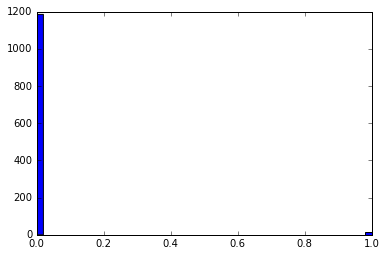

error test
pos 256 neg 280
pos_pred 261 neg_pred 275
fp 0.2537313432835821 fn 0.24440298507462688 tp 0.2332089552238806 tn 0.26865671641791045
acc 0.5018656716417911 tpr 0.48828124999999994 tnr 0.5142857142857143


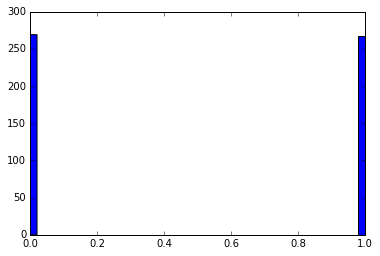

In [86]:
cls = DecisionTreeClassifier(max_depth=15)
cls.fit(train_X, train_y)

print ('error train')
pred_y = cls.predict(train_X)
plt.hist(abs(pred_y - train_y), 50)
print_result (pred_y, train_y)
plt.show()

plt.plot()

print ('error test')
pred_y = cls.predict(test_X)
plt.hist(abs(pred_y - test_y), 50)
print_result (pred_y, test_y)
plt.show()

In [72]:
rtree = sklearn.ensemble.RandomForestClassifier()
scores = cross_validation.cross_val_score(rtree, X, y, cv = 10)

In [73]:
scores

array([ 0.57714286,  0.56571429,  0.52298851,  0.54022989,  0.57225434,
        0.54913295,  0.59537572,  0.47976879,  0.56069364,  0.57803468])